In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
listing = pd.read_csv('Listings.csv', encoding="ISO-8859-1", low_memory=False)

In [6]:
listing.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [9]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [8]:
listing['host_since'] = pd.to_datetime(listing['host_since']) # Typecasting the host_since column to datetime datatype

In [12]:
paris_listing = (
    listing
    .query("city == 'Paris'")
    .loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
)
paris_listing.info()

# Filtering down the columns for the analysis

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [15]:
paris_listing.dropna() # Dropping the null rows 

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279707,2015-04-13,Observatoire,Paris,2,120
279708,2013-11-27,Buttes-Montmartre,Paris,2,60
279709,2012-04-27,Buttes-Montmartre,Paris,2,50
279710,2015-07-16,Popincourt,Paris,2,105


In [20]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [25]:
paris_listing[['accommodates','price']].describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [33]:
paris_listing.query('price == 0').count() 

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [36]:
paris_listing_neighbourhood = (
    paris_listing
    .groupby('neighbourhood')
    .agg({'price':'mean'})
    .sort_values('price')
)

paris_listing_neighbourhood.tail()


,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [39]:
paris_listing_accommodates = (
    paris_listing
    .query("neighbourhood == 'Elysee'")
    .groupby('accommodates')
    .agg({'price':'mean'})
    .sort_values('price')
)

paris_listing_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [45]:
paris_listing_over_time = (
    paris_listing
    .set_index('host_since')
    .resample('Y')
    .agg({
        'neighbourhood':'count',
        'price':'mean'
    })
)
paris_listing_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


# Visualizations

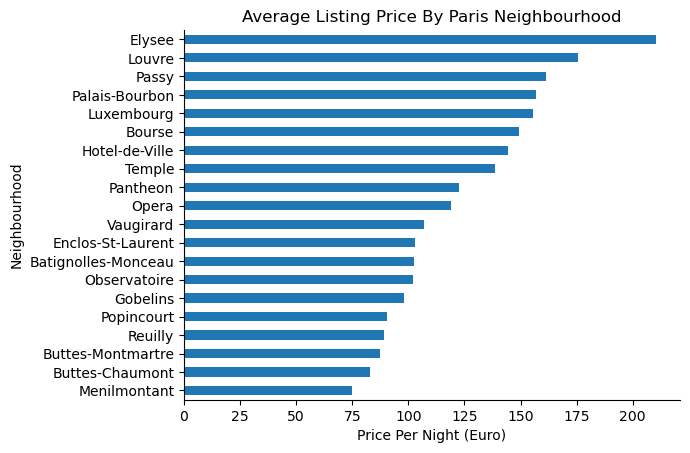

In [60]:
(paris_listing_neighbourhood
 .plot
 .barh(
    title='Average Listing Price By Paris Neighbourhood',
    xlabel='Price Per Night (Euro)',
    ylabel='Neighbourhood',
    legend=False
 )
)
sns.despine() 

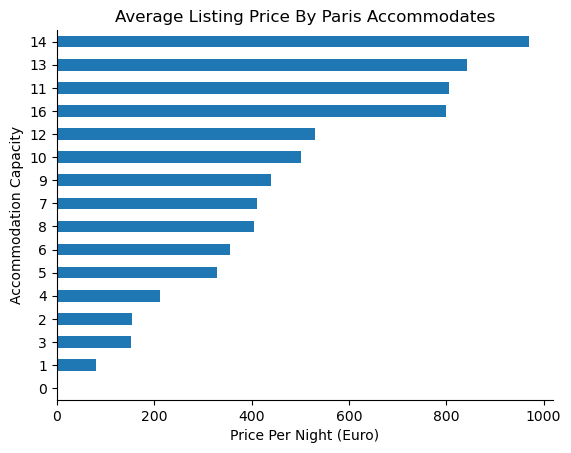

In [95]:
(paris_listing_accommodates
 .plot
 .barh(
    title='Average Listing Price By Paris Accommodates',
    xlabel='Price Per Night (Euro)',
    ylabel='Accommodation Capacity',
    legend=False
 )
)
sns.despine() 

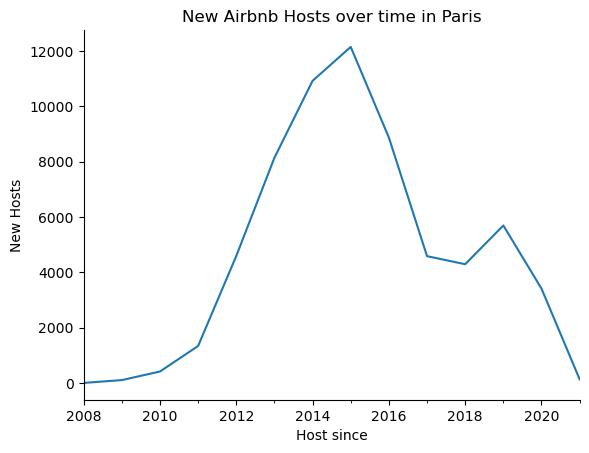

In [79]:
paris_listing_over_time['neighbourhood'].plot(
    ylabel='New Hosts',
    xlabel='Host since',
    title='New Airbnb Hosts over time in Paris'
    
)
sns.despine()

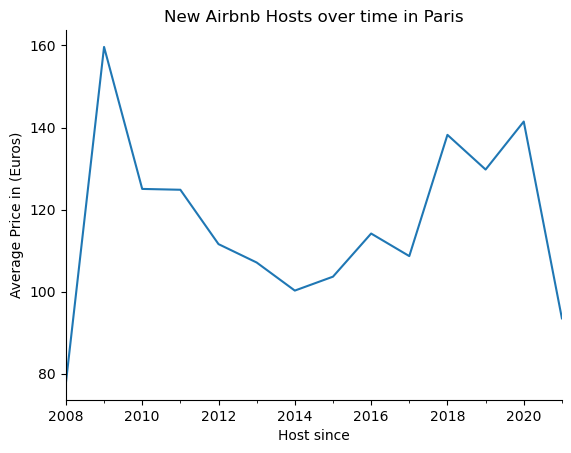

In [78]:
paris_listing_over_time['price'].plot(
    ylabel='Average Price in (Euros)',
    xlabel='Host since',
    title='New Airbnb Hosts over time in Paris'
    
)
sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices ')

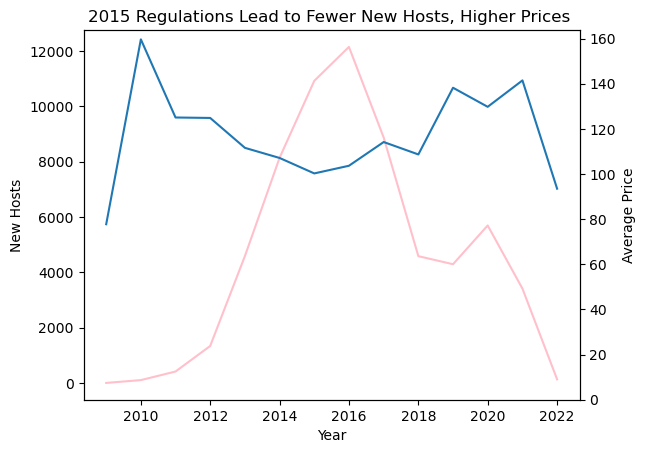

In [92]:
fig, ax = plt.subplots()

ax.plot(
    paris_listing_over_time.index,
    paris_listing_over_time['neighbourhood'],
    label='New Hosts',
    c='Pink'
)

ax.set_ylabel('New Hosts')
ax.set_xlabel('Year')

ax2 = ax.twinx()

ax2.plot(
    paris_listing_over_time.index,
    paris_listing_over_time['price'],
    label='Average Price'
  
)
ax2.set_ylim(0)
ax2.set_ylabel('Average Price')
ax.set_title('2015 Regulations Lead to Fewer New Hosts, Higher Prices')